In [1]:
# Multilinear Regression
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Pooja/Desktop/50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


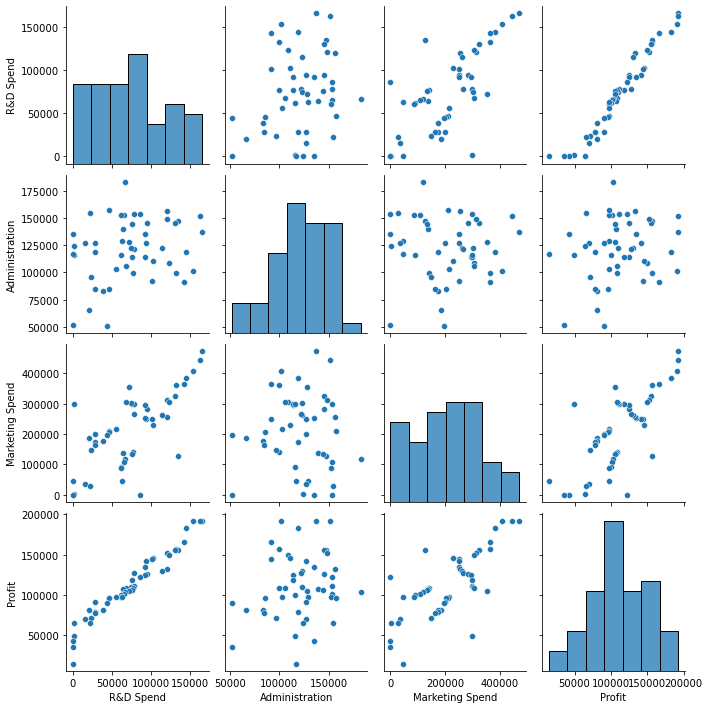

In [5]:
sns.pairplot(df)

In [7]:
data = pd.get_dummies(df,["State"])

In [8]:
data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [9]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


# state_new york column has lower correlation value so the column is dropped

In [10]:
data=data.drop("State_New York",axis=1)

In [11]:
data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,0,0
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,0
9,123334.88,108679.17,304981.62,149759.96,1,0


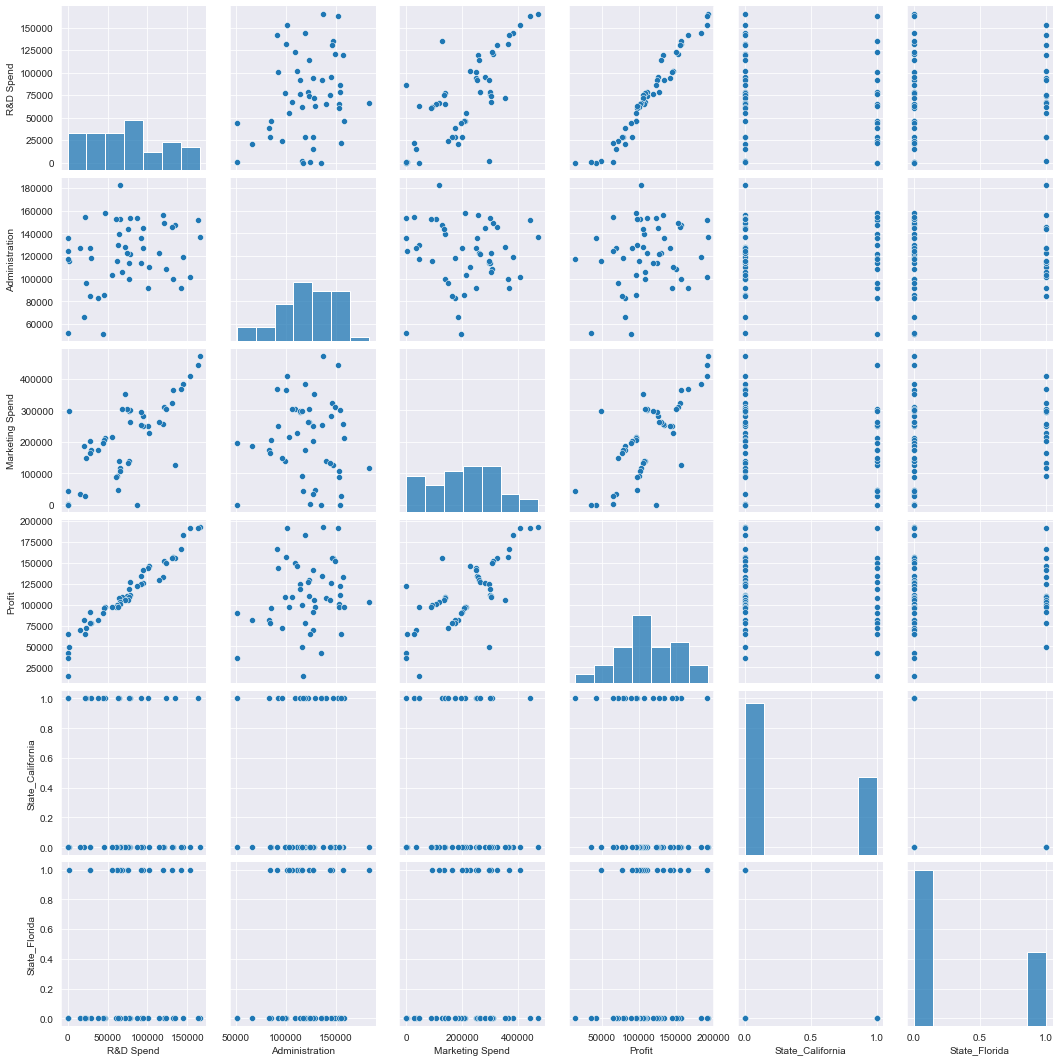

In [12]:
sns.set_style(style="darkgrid")
sns.pairplot(data)

In [13]:
Y=data.iloc[:,3]
Y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [14]:
X = data.iloc[ : , data.columns !="Profit"]
X

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1
5,131876.90,99814.71,362861.36,0,0
6,134615.46,147198.87,127716.82,1,0
7,130298.13,145530.06,323876.68,0,1
8,120542.52,148718.95,311613.29,0,0
9,123334.88,108679.17,304981.62,1,0


In [16]:
model1 = data.rename({"R&D Spend":"RD","Administration":"Admin","Marketing Spend":"Marketing","State_California":"California","State_Florida":"florida"},axis=1,inplace=True)

In [17]:
model1=smf.ols("Profit~RD+Admin+Marketing+California+florida",data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           1.34e-27
Time:                        20:50:30   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
RD             0.8060      0.046     17.369      0.000       0.712       0.900
Admin         -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing      0.0270      0.017      1.574      0.123      -0.008       0.062
California    41.8870   3256.039      0.013      0.990   -6520.229    6604.003
florida      240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
vif1=smf.ols('RD~Admin+Marketing+California+florida',data=data).fit().rsquared
vif_rd=1/(1-vif1)
vif_rd

2.4955109215494433

In [19]:
vif2=smf.ols('Admin~RD+Marketing+California+florida',data=data).fit().rsquared
vif_admin=1/(1-vif2)
vif_admin

1.177766050899384

In [20]:
vif3=smf.ols('Marketing~RD+Admin+California+florida',data=data).fit().rsquared
vif_marketing=1/(1-vif3)
vif_marketing

2.4167967566863946

In [21]:
vif4=smf.ols('California~RD+Admin+Marketing+florida',data=data).fit().rsquared
vif_california=1/(1-vif4)
vif_california

1.3350608769628545

In [22]:
vif5=smf.ols('florida~RD+Admin+Marketing+California',data=data).fit().rsquared
vif_florida=1/(1-vif5)
vif_florida

1.3612992664384325

In [23]:
vifvalues=pd.DataFrame({"variables":['RD','Admin','Marketing','California','florida'],"vif":[2.49,1.17,2.41,1.33,1.36]})
vifvalues

,variables,vif
0,RD,2.49
1,Admin,1.17
2,Marketing,2.41
3,California,1.33
4,florida,1.36


# no higher VIF value, we are going to include all for prediction model

# Checking whether data has any influential values 

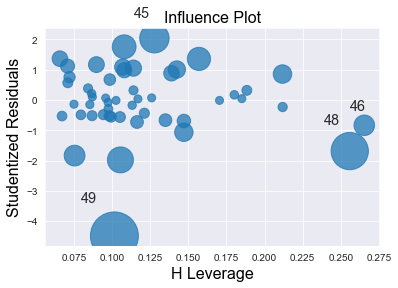

In [24]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

# index 49 is showing high influence so we can exclude this entire row

In [25]:
data=data.drop(data.index[49],axis=0).reset_index()

In [26]:
data

,index,RD,Admin,Marketing,Profit,California,florida
0,0,165349.20,136897.80,471784.10,192261.83,0,0
1,1,162597.70,151377.59,443898.53,191792.06,1,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1
3,3,144372.41,118671.85,383199.62,182901.99,0,0
4,4,142107.34,91391.77,366168.42,166187.94,0,1
5,5,131876.90,99814.71,362861.36,156991.12,0,0
6,6,134615.46,147198.87,127716.82,156122.51,1,0
7,7,130298.13,145530.06,323876.68,155752.60,0,1
8,8,120542.52,148718.95,311613.29,152211.77,0,0
9,9,123334.88,108679.17,304981.62,149759.96,1,0


In [27]:
model2=smf.ols("Profit~RD+Admin+Marketing+California+florida",data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           2.51e-29
Time:                        21:08:44   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.143e+04   5812.919      8.847      0.000    3.97e+04    6.31e+04
RD             0.7836      0.039     20.056      0.000       0.705       0.862
Admin         -0.0220      0.044     -0.505      0.616      -0.110       0.066
Marketing      0.0258      0.014      1.804      0.078      -0.003       0.055
California  1954.0177   2751.932      0.710      0.482   -3595.783    7503.818
florida      389.7935   2788.050      0.140      0.889   -5232.845    6012.432
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# model2 has the highest r_squared values so it is the best model

In [30]:
print(model2.conf_int(0.01))

                       0             1
Intercept   35758.804943  67091.623986
RD              0.678292      0.888887
Admin          -0.139599      0.095554
Marketing      -0.012761      0.064403
California  -5462.721120   9370.756522
florida     -7124.285919   7903.872832


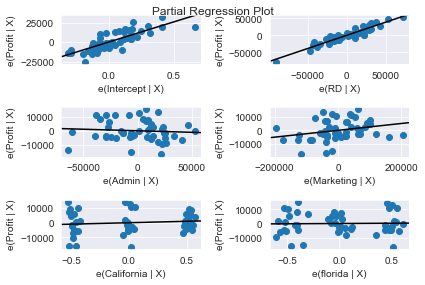

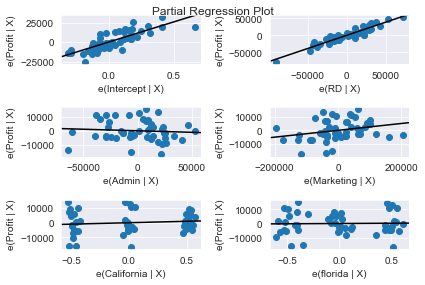

In [31]:
sm.graphics.plot_partregress_grid(model2)

In [36]:
model2.fittedvalues

0     190158.286185
1     188917.339413
2     180356.022379
3     171835.121622
4     170611.039177
5     161933.895088
6     158918.600299
7     159073.187404
8     150652.118920
9     155504.737225
10    135154.667794
11    136691.955053
12    129012.886836
13    129003.663840
14    148977.165563
15    145223.746646
16    118657.325455
17    129698.996135
18    128809.413614
19    115762.021211
20    118335.175808
21    117203.470112
22    114924.439923
23    110273.368722
24    113239.472233
25    104538.867178
26    111129.014562
27    114231.691138
28    102600.701013
29    102229.270972
30    100199.636827
31     98246.061777
32    101409.986650
33     98572.020995
34     91728.442639
35     90915.064149
36     76670.864919
37     91870.126205
38     70608.331245
39     86284.488239
40     77761.930431
41     76052.890197
42     73607.243231
43     61687.603280
44     68079.899187
45     49523.991274
46     57967.070071
47     50396.799144
48     50710.448014
dtype: float64

In [37]:
model2.resid

0      2103.543815
1      2874.720587
2     10694.367621
3     11066.868378
4     -4423.099177
5     -4942.775088
6     -2796.090299
7     -3320.587404
8      1559.651080
9     -5744.777225
10    10967.282206
11     7567.444947
12    12572.633164
13     5303.686160
14   -16374.515563
15   -15306.706646
16     8335.604545
17    -4328.626135
18    -4542.513614
19     7014.838789
20      138.854192
21    -5890.450112
22    -4572.189923
23    -1539.378722
24    -4687.432233
25     2865.472822
26    -5395.474562
27    -9223.381138
28      681.678987
29    -1224.630972
30     -262.046827
31     -762.501777
32    -3982.146650
33    -1793.100995
34     4984.357361
35     5564.445851
36    14037.325081
37    -1920.986205
38    10620.728755
39    -5278.728239
40      477.979569
41     1745.939803
42    -2108.753231
43     8071.376720
44    -2879.569187
45    15402.088726
46    -8476.320071
47    -7837.069144
48   -15037.038014
dtype: float64

In [38]:
data["predicted"] = model2.fittedvalues
data["Errors"] = model2.resid

In [39]:
data

,index,RD,Admin,Marketing,Profit,California,florida,predicted,Errors
0,0,165349.20,136897.80,471784.10,192261.83,0,0,190158.286185,2103.543815
1,1,162597.70,151377.59,443898.53,191792.06,1,0,188917.339413,2874.720587
2,2,153441.51,101145.55,407934.54,191050.39,0,1,180356.022379,10694.367621
3,3,144372.41,118671.85,383199.62,182901.99,0,0,171835.121622,11066.868378
4,4,142107.34,91391.77,366168.42,166187.94,0,1,170611.039177,-4423.099177
5,5,131876.90,99814.71,362861.36,156991.12,0,0,161933.895088,-4942.775088
6,6,134615.46,147198.87,127716.82,156122.51,1,0,158918.600299,-2796.090299
7,7,130298.13,145530.06,323876.68,155752.60,0,1,159073.187404,-3320.587404
8,8,120542.52,148718.95,311613.29,152211.77,0,0,150652.118920,1559.651080
9,9,123334.88,108679.17,304981.62,149759.96,1,0,155504.737225,-5744.777225
